In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load the data from an example CSV file
data = pd.read_csv('./dataquest_fraud_train.csv')

# Converting transDate to datetime
data['transDate'] = pd.to_datetime(data['transDate'])

# Extracting year and month from the date for grouping
data['YearMonth'] = data['transDate'].dt.to_period('M')

df = pd.DataFrame(data)

/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_53782/4014137261.py:2: DtypeWarning: Columns (0,2,3,5,6,7,8,9,10,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./dataquest_fraud_train.csv')


In [10]:
data.head()

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,longitude,cityPop,job,dateOfBirth,transNum,unixTime,merchLatitude,merchLongitude,isFraud,YearMonth
0,2019-01-01 04:28:00,4.119763e+15,fraud_Welch Inc,misc_net,4.10,Melinda,Gutierrez,F,1497 West Gateway,Eureka,...,-89.2706,6713.0,Archivist,1945-08-19,3fc1791ff1db94ce9540262d7eb973e4,1.325392e+09,40.020043,-89.693412,0.0,2019-01
1,2019-01-01 04:28:00,3.607811e+13,fraud_Auer-West,shopping_net,2.67,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,-82.9161,798.0,Facilities manager,1926-06-26,edbf65b8606b53fc48168c2daa5933e5,1.325392e+09,37.622362,-82.676007,0.0,2019-01
2,2019-01-01 04:29:00,4.449531e+15,fraud_Balistreri-Nader,misc_pos,22.88,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,...,-122.9145,337.0,Occupational psychologist,1954-07-05,2fcbde131cff833751dde53da54da6da,1.325392e+09,39.060101,-121.969417,0.0,2019-01
3,2019-01-01 04:29:00,4.302475e+15,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,Daniel,Cain,M,384 Newman Forks Apt. 370,Belmond,...,-93.6200,3032.0,Community pharmacist,1964-08-08,bcae564f9a1a299dfbd1efd917499968,1.325392e+09,43.280848,-94.340312,0.0,2019-01
4,2019-01-01 04:32:00,3.772340e+14,fraud_Hudson-Ratke,grocery_pos,129.06,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,-77.8229,1925.0,Systems developer,1966-02-14,5e42e35c255edb55a192b3f1f0600936,1.325392e+09,39.211630,-78.409044,0.0,2019-01


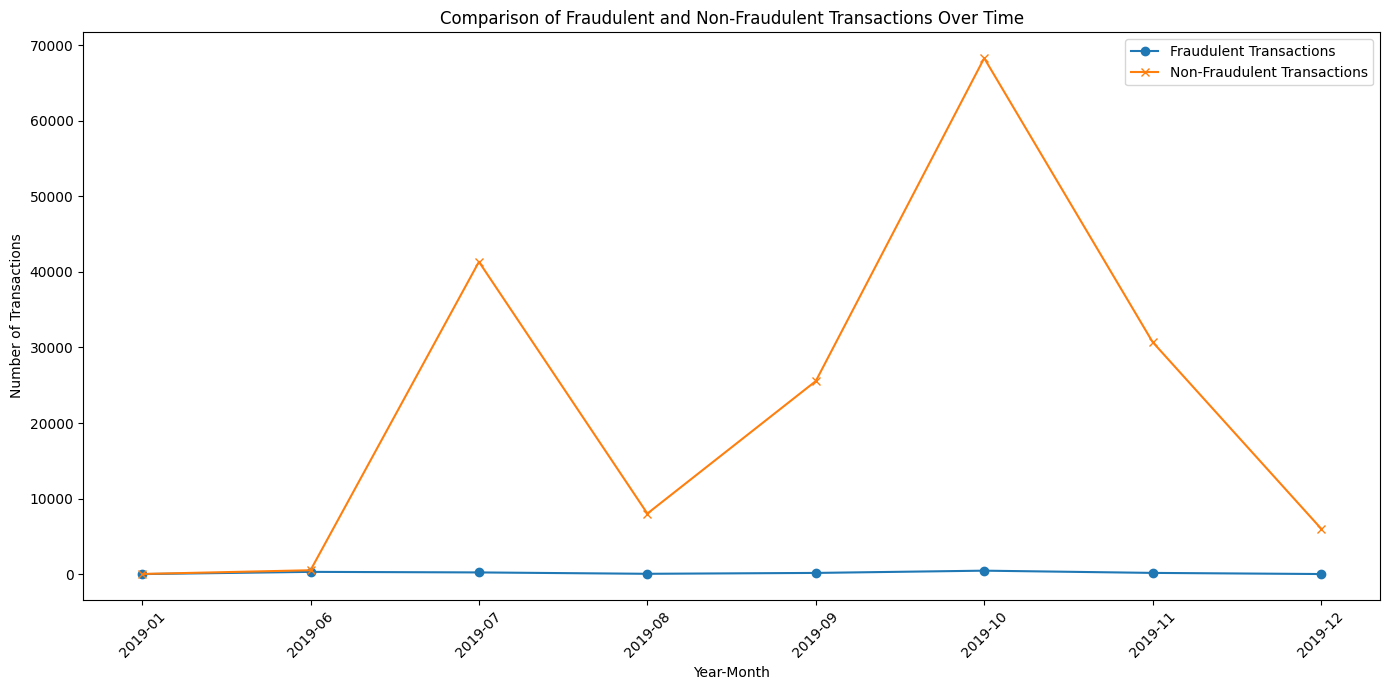

In [13]:
# Converting transDate to datetime
data['transDate'] = pd.to_datetime(data['transDate'])

# Extracting year and month from the date for grouping
data['YearMonth'] = data['transDate'].dt.to_period('M')

# Calculating the number of fraudulent and non-fraudulent transactions per month
fraud_trends = data.groupby(['YearMonth', 'isFraud']).size().unstack(fill_value=0)

# Resetting the index to have YearMonth as a column
fraud_trends.reset_index(inplace=True)

# Renaming columns for clarity
fraud_trends.columns = ['YearMonth', 'NotFraud', 'Fraud']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(fraud_trends['YearMonth'].astype(str), fraud_trends['Fraud'], marker='o', label='Fraudulent Transactions')
plt.plot(fraud_trends['YearMonth'].astype(str), fraud_trends['NotFraud'], marker='x', label='Non-Fraudulent Transactions')
plt.title('Comparison of Fraudulent and Non-Fraudulent Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()



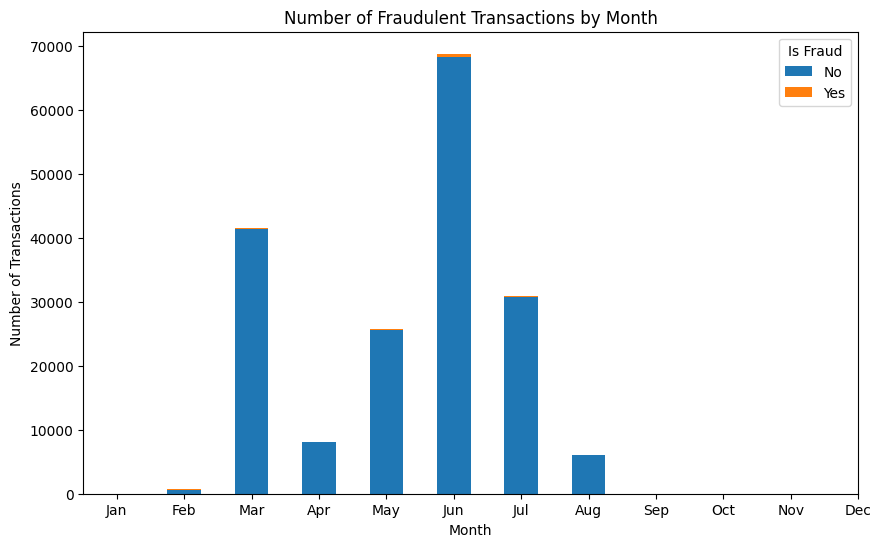

In [11]:
# Calculating the number of fraudulent and non-fraudulent transactions per month
fraud_trends = data.groupby(['YearMonth', 'isFraud']).size().unstack(fill_value=0)

# Resetting the index to have YearMonth as a column
fraud_trends.reset_index(inplace=True)

# Renaming columns for clarity
fraud_trends.columns = ['YearMonth', 'NotFraud', 'Fraud']

fraud_by_month = df.groupby([df['transDate'].dt.month, 'isFraud']).size().unstack(fill_value=0)

# Plot
fraud_by_month.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Number of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

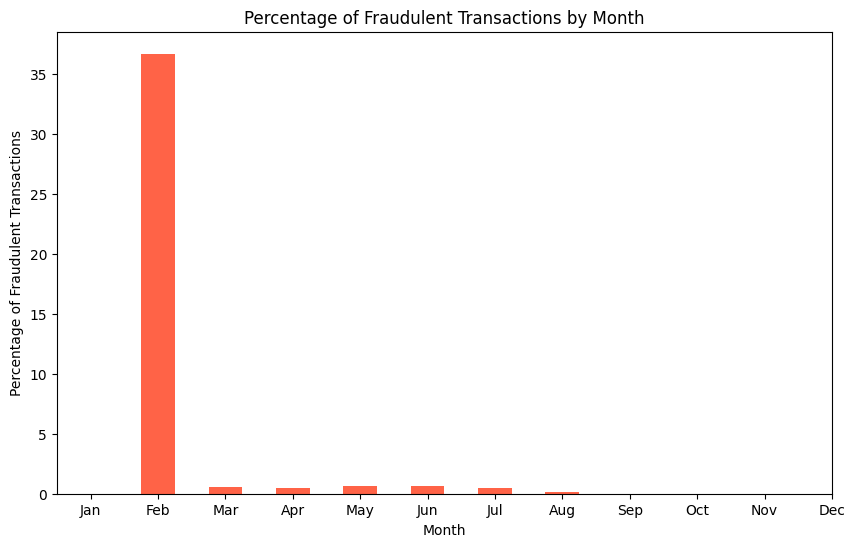

In [12]:
# Calculate the percentage of fraudulent transactions by month
fraud_percent_by_month = (fraud_by_month[1] / (fraud_by_month[0] + fraud_by_month[1])) * 100

# Plot
fraud_percent_by_month.plot(kind='bar', figsize=(10,6), color='tomato')
plt.title('Percentage of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

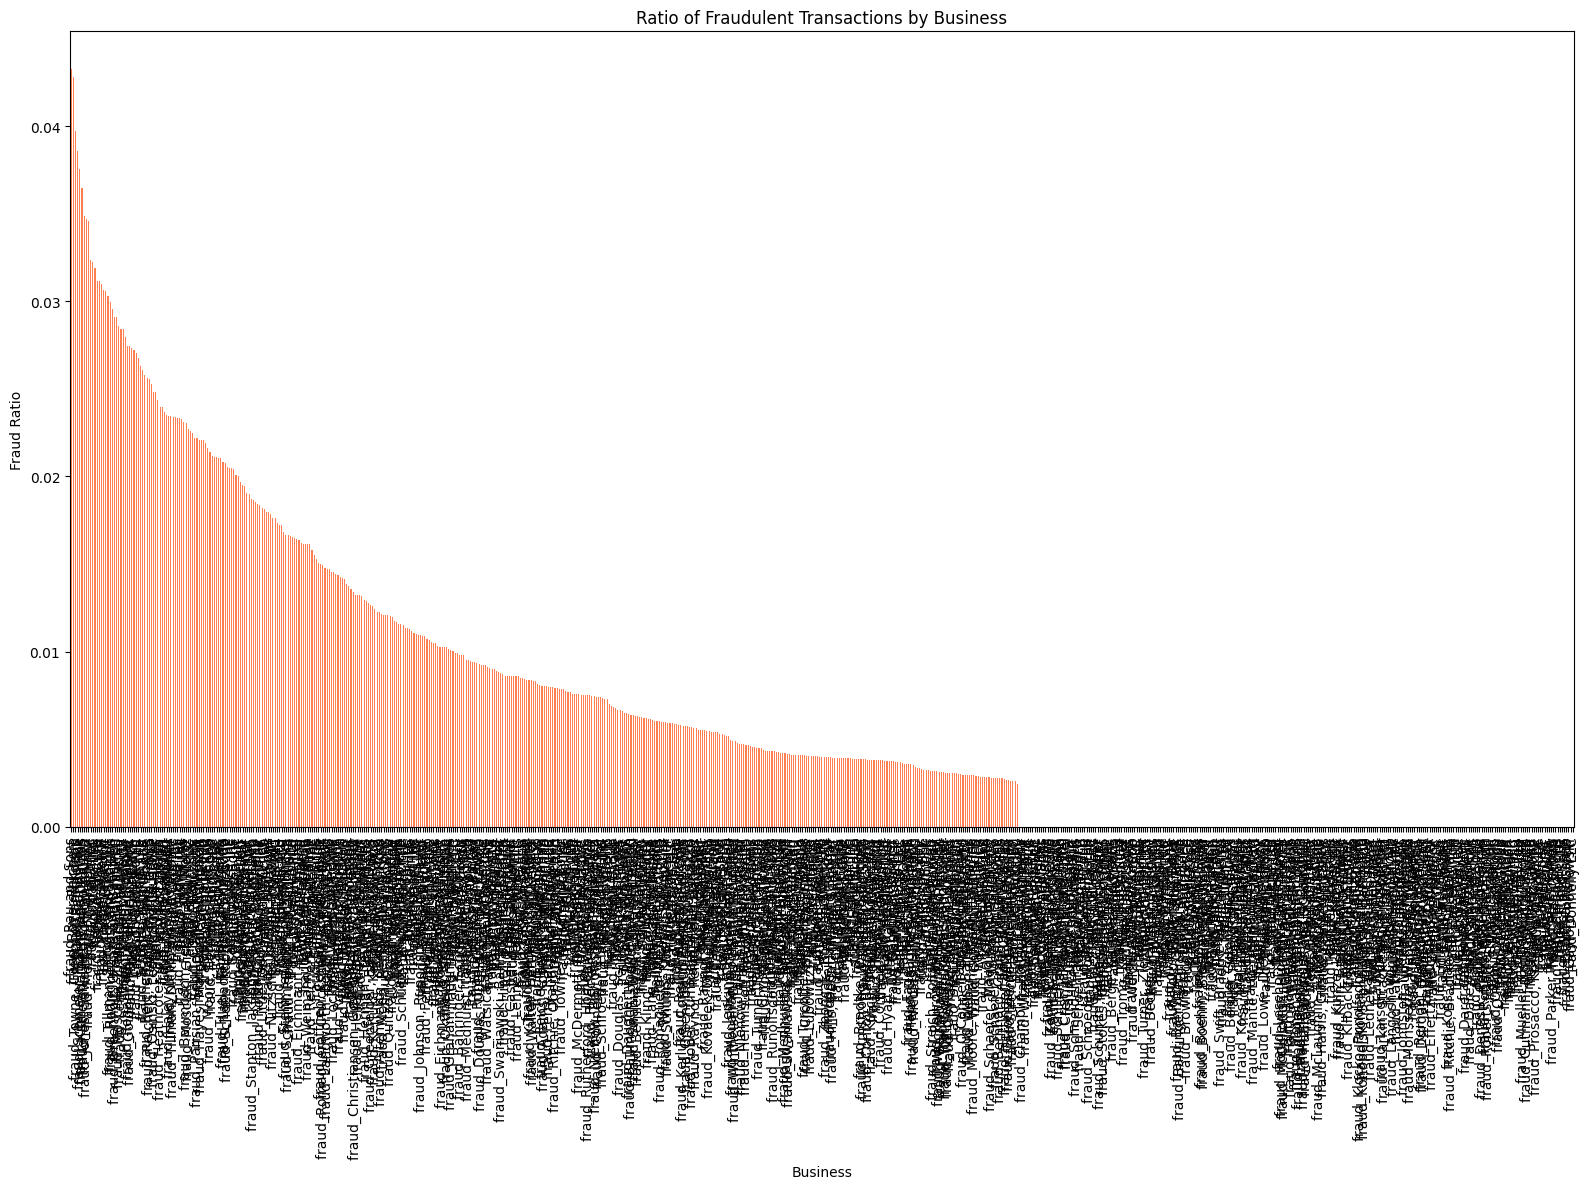

In [15]:
# Group by 'business' and 'isFraud' and calculate the count
fraud_counts_by_business = df.groupby(['business', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each business
fraud_counts_by_business['FraudRatio'] = fraud_counts_by_business[1] / (fraud_counts_by_business[0] + fraud_counts_by_business[1])

# Sort the businesses by fraud ratio
sorted_businesses = fraud_counts_by_business.sort_values('FraudRatio', ascending=False)

# Plot the sorted ratios
plt.figure(figsize=(16, 12))
sorted_businesses['FraudRatio'].plot(kind='bar', color='coral')
plt.title('Ratio of Fraudulent Transactions by Business')
plt.xlabel('Business')
plt.ylabel('Fraud Ratio')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()